# Class 6 exercises

In [1]:
import gensim.downloader as api

# Pre-trained vectors based on Wikipedia 2014 + Gigaword, 
# 5.6B tokens, 400K vocab, 
# uncased (https://nlp.stanford.edu/projects/glove/).
# embedding size 50 (so fairly small, but easy to work with)
word_emb = api.load("glove-wiki-gigaword-50")

In [53]:
import numpy as np
def cosine(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))


In [50]:
def plot_word_embeddings(words, embedding):
    """Plot the words embedding in 2D using a scatter plot and PCA

    Args:
        words (List[str]): List of words
        embedding: Your word embedding as  gensim keyed vectors object.

    Returns:
        A matplotlib plot object
    """
    # extract word embedding matrix
    X = embedding[words]

    # apply a dimensionality reduction method of your choosing e.g. PCA
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    import pandas as pd
    df = pd.DataFrame(X_pca, index=words, columns=['x', 'y']) # create a dataframe for plotting

    # create a plot object
    import matplotlib.pyplot as plt
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    # add point for the words
    ax.scatter(df['x'], df['y'])

    # add word label to each point
    for word, pos in df.iterrows():
            ax.annotate(word, pos)
    
    return ax

### 3.1. Discuss how you could use word embeddings to find pluralis of a word
  - apply it to three cases
  - plot these, does there seem to be a *plural component*?

In [12]:
sim = word_emb.most_similar(positive = ["horse", "oranges"], negative=["orange"], topn=1)
print(sim)
sim = word_emb.most_similar(positive = ["mango", "oranges"], negative=["orange"], topn=1)
print(sim)
sim = word_emb.most_similar(positive = ["cat", "women"], negative=["woman"], topn=1)
print(sim)

[('horses', 0.6972572803497314)]
[('mangoes', 0.8602045774459839)]
[('cats', 0.8044424653053284)]


[]

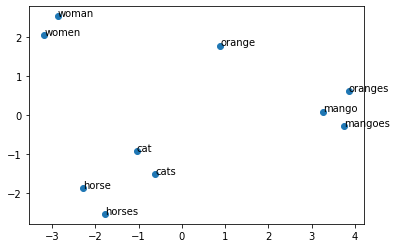

In [13]:
words_to_plot = ["orange", "oranges", "horse", "horses", "mango", "mangoes", "cat", "cats", "woman", "women"]
ax = plot_word_embeddings(words=words_to_plot, embedding=word_emb)
ax.plot()

### 3.2. Discuss how you would find the antonym of a word
  - apply it to three cases
  - plot these, does there seem to be a *antonym component*?

In [47]:
sim = word_emb.most_similar(positive = ["small", "up"], negative=["down"], topn=1)
print(sim)
sim = word_emb.most_similar(positive = ["fast", "large"], negative=["small"], topn=1)
print(sim)
sim = word_emb.most_similar(positive = ["beautiful", "slow"], negative=["fast"], topn=1)
print(sim)

[('large', 0.9315248727798462)]
[('slow', 0.876235842704773)]
[('lovely', 0.8572112917900085)]


[]

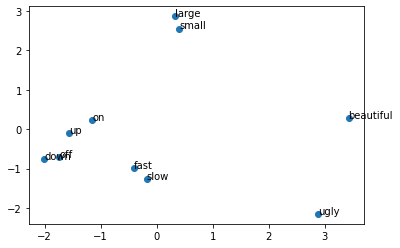

In [49]:
words_to_plot = ["small", "large", "up", "down", "fast", "slow", "beautiful", "ugly", "on", "off"]
ax = plot_word_embeddings(words=words_to_plot, embedding=word_emb)
ax.plot()

### 4. You can also use word embedding to detect the odd one out 
- For instance which word does not belong in *Ross, Kenneth, Tim, glass*? You can do this simply using: `word_emb.doesnt_match("kenneth ross tim glass".split())`. Try this out on three samples.
- Typically word embeddings are quite intuitive, discuss or write down your best answer to how one might find the odd one out?

In [61]:
print(word_emb.doesnt_match("kenneth ross tim glass".split()),
      word_emb.doesnt_match("horse cow goat mango".split()),
      word_emb.doesnt_match("blue red green magenta".split()), sep ='\n')

glass
mango
magenta


In [99]:
words = "horse cow goat mango".split()
d = {}

for word in words:
    sim = sum([word_emb.similarity(word, new_word) for new_word in words])/len(words)
    d[word] = sim

print(d)
print(min(d.items(), key= lambda x: x[1]))


{'horse': 0.5673723518848419, 'cow': 0.6304495856165886, 'goat': 0.7182816565036774, 'mango': 0.5197761282324791}
('mango', 0.5197761282324791)


In [100]:
mean = sum([word_emb[word] for word in words])/len(words)

d = {}
for word in words:
    d[word] = cosine(mean, word_emb[word])

print(d)
print(min(d.items(), key= lambda x: x[1]))

{'horse': 0.7373246, 'cow': 0.8132138, 'goat': 0.9147946, 'mango': 0.6554898}
('mango', 0.6554898)


### 5. Which word embedding is closest to the word embedding of *corona*; *virus* or *beer*? 
- Justify your answer before you test it using the word embedding.
- What does this tell you about word embeddings?

In [98]:
print(word_emb.similarity('corona', 'beer'),
      word_emb.similarity('corona', 'virus'),
      word_emb.similarity('corona', 'mexico'),
      word_emb.similarity('corona', 'lime'), sep='\n')

print(word_emb.most_similar('corona', topn=10))

0.11074722
0.21541153
0.3652512
0.3741919
[('cruces', 0.6676092147827148), ('janiero', 0.661956250667572), ('segundo', 0.6618181467056274), ('colle', 0.6601405143737793), ('guadalajara', 0.6472588777542114), ('trevi', 0.6386085152626038), ('indio', 0.6357836723327637), ('nido', 0.6281096935272217), ('monte', 0.6276906132698059), ('aurora', 0.6240447759628296)]
